**<h1> Manipulating Images </h1>**


Estimated time needed: **30** minutes


<h2>Objectives</h2>


In this lab, you will learn how to manipulate images, OpenCV image Arrays. You will learn how to copy an image to avoid aliasing. We will cover flipping images and cropping images. You will also learn to change pixel images; this will allow you to draw shapes, write text and superimpose images over other images.


<ul>
    <li><a href='#MI'>Manipulating Images </a>
        <ul>
            <li>Copying Images  </li>
            <li>Fliping Images </li>
            <li>Cropping an Image </li>
            <li>Changing Specific Image Pixels </li>
     
  
    
</ul>


----


Download the images for the lab


In [ ]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/cat.png -O cat.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png

We will be using these imported functions in the lab


In [1]:
import matplotlib.pyplot as plt #thư viện matplotlib để hiển thị ảnh và biểu đồ
import cv2 #thư viện opencv dùng để đọc và xử lý ảnh
import numpy as np #thư viện numpy dùng để xử lý mảng số và pixel ảnh

## Copying Images


If you want to reassign an array to another variable, you should use the `copy` method. If we do not apply the method `copy()`, the variable will point to the same location in memory. Consider the following array:


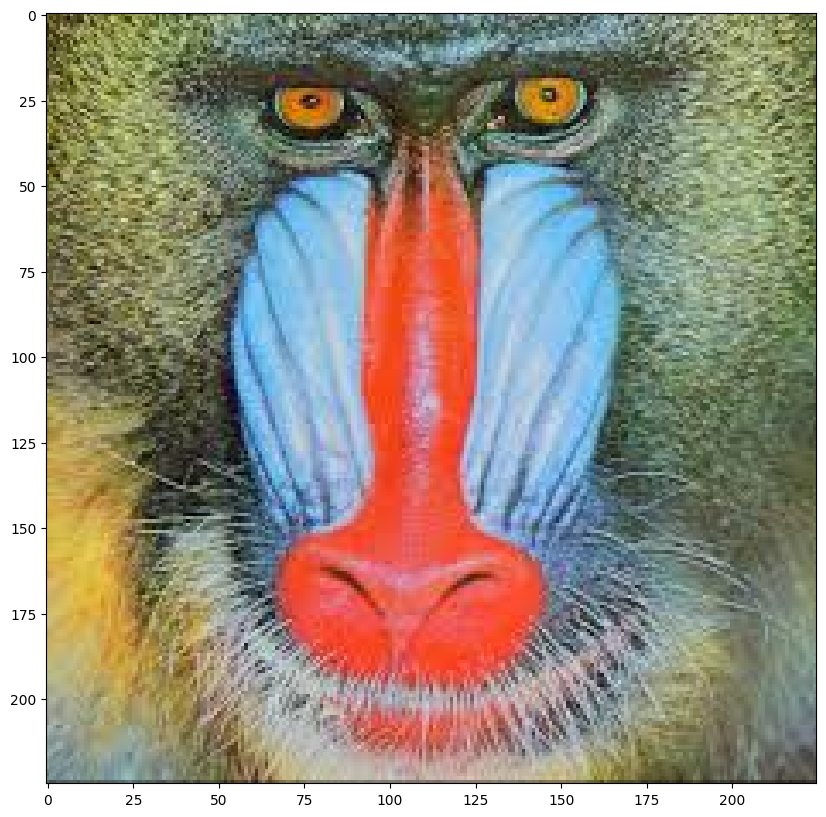

In [5]:
baboon = cv2.imread("baboon.jpg") #đọc ảnh baboon.jpg bằng opencv theo định dạng bgr
plt.figure(figsize=(10,10)) #tạo figure mới kích thước 10x10 inch
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB)) #chuyển ảnh từ bgr sang rgb để hiển thị đúng màu
plt.show() #hiển thị ảnh ra màn hình

If we do not apply the method `copy()`, the new variable will point to the same location in memory:


In [6]:
A = baboon #gán A trỏ đến cùng vùng nhớ với baboon

we use the `id` function to find the object's memory address; we see it is the same as the original array.


In [7]:
id(A)==id(baboon) #kiểm tra A và baboon có cùng địa chỉ bộ nhớ hay không
id(A) #trả về địa chỉ bộ nhớ của biến A

2652666315856

If we apply the method `copy()</coode>, the memory address is different 


In [8]:
B = baboon.copy() #tạo bản sao độc lập của baboon sang vùng nhớ mới
id(B)==id(baboon) #kiểm tra B và baboon có cùng địa chỉ bộ nhớ hay không

False

When we do not apply the method <code>copy()</code>, the variable will point to the same location in memory. Consider the array <code>baboon</code>, if we set all its values to zero, then all the values in <code>A</code> will be zero. This is because <code>baboon</code> and <code>A</code> point to the same place in memory, but <code>B</code> will not be affected. 


In [9]:
baboon[:, :,] = 0 #gán toàn bộ pixel về 0 làm ảnh baboon trở thành màu đen

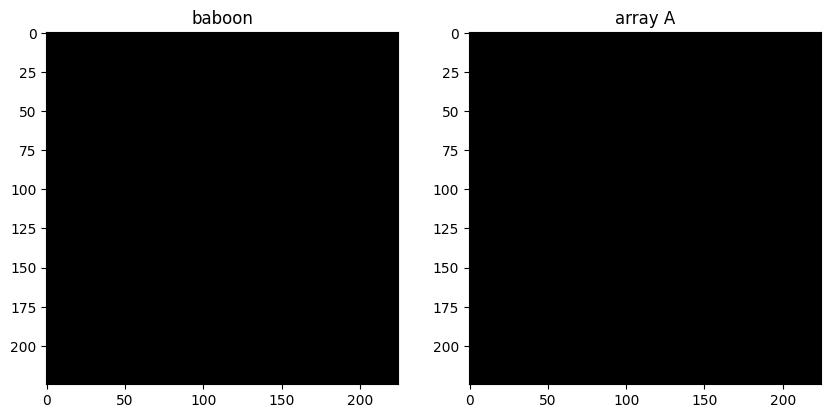

In [10]:
plt.figure(figsize=(10,10)) #tạo figure mới kích thước 10x10 inch
plt.subplot(121) #chia figure thành 1 hàng 2 cột và chọn ô đầu tiên
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB)) #hiển thị ảnh baboon đã bị thay đổi
plt.title("baboon") #đặt tiêu đề cho ảnh baboon
plt.subplot(122) #chuyển sang ô thứ hai
plt.imshow(cv2.cvtColor(A, cv2.COLOR_BGR2RGB)) #hiển thị ảnh A bị thay đổi do dùng chung vùng nhớ
plt.title("array A") #đặt tiêu đề cho ảnh array A
plt.show() #hiển thị toàn bộ figure

We see they are the same, this is called aliasing. Aliasing happens whenever one variable's value is assigned to another variable because variables are just names that store references to values. We can also compare <code>baboon</code> and array <code>B</code>:


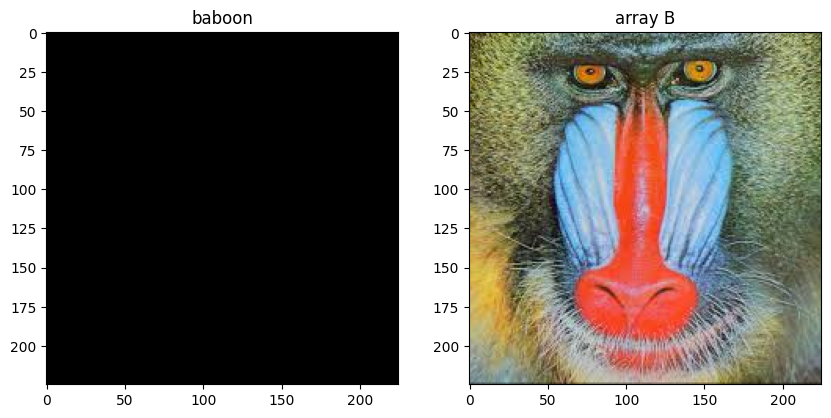

In [11]:
plt.figure(figsize=(10,10)) #tạo figure mới kích thước 10x10 inch
plt.subplot(121) #chia figure thành 1 hàng 2 cột và chọn ô đầu tiên
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB)) #hiển thị ảnh baboon đã bị thay đổi
plt.title("baboon") #đặt tiêu đề cho ảnh baboon
plt.subplot(122) #chuyển sang ô thứ hai
plt.imshow(cv2.cvtColor(B, cv2.COLOR_BGR2RGB)) #hiển thị ảnh B không bị ảnh hưởng vì copy độc lập
plt.title("array B") #đặt tiêu đề cho ảnh array B
plt.show() #hiển thị toàn bộ figure


They are different because they used the method copy.


## Fliping Images 


Flipping images involves reordering the index of the pixels such that it changes the orientation of the image. Consider the following image:


In [ ]:
image = cv2.imread("cat.png") #đọc ảnh cat.png bằng opencv theo định dạng bgr
plt.figure(figsize=(10,10)) #tạo figure mới kích thước 10x10 inch
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) #chuyển ảnh từ bgr sang rgb để hiển thị đúng màu
plt.show() #hiển thị ảnh ra màn hình

We can cast it to an array and find the shape:


In [ ]:
width, height,C= image.shape #lấy chiều cao, chiều rộng và số kênh màu của ảnh
print('width, height,C', width, height, C) #in ra kích thước và số kênh màu của ảnh

Let's Flip i.e rotate it vertically. First, we create an array of equal size of type <code>np.uint8</code> bit image.


In [ ]:
array_flip = np.zeros((width, height, C), dtype=np.uint8) #tạo mảng rỗng để lưu ảnh lật với cùng kích thước

We assign the first row of pixels of the original array to the new array's last row. We repeat the process for every row, incrementing the row number for the original array and decreasing the new array's row index assigning the pixels accordingly.


In [ ]:
for i, row in enumerate(image): #duyệt từng hàng pixel của ảnh kèm chỉ số i
    array_flip[width - 1 - i, :, :] = row #đảo vị trí các hàng pixel để lật ảnh theo chiều dọc

We plot the results


In [ ]:
plt.figure(figsize=(5,5)) #tạo figure mới kích thước 5x5 inch
plt.imshow(cv2.cvtColor(array_flip, cv2.COLOR_BGR2RGB)) #hiển thị ảnh đã lật thủ công
plt.show() #hiển thị ảnh ra màn hình

<code>OpenCV</code>has several ways to flip an image, we can use  the <code>flip()</code> function; we have the input image array. The parameter is the <code>flipCode</code>

is the value indicating what kind of flip we would like to perform; 
<li><code>flipcode</code> = 0: flip vertically around the x-axis</li>
<li><code>flipcode</code> > 0: flip horizontally around y-axis positive value</li>
<li><code>flipcode</code>&#60 0: flip vertically and horizontally, flipping around both axes negative value</li>
Let apply different <code>flipcode</code>'s in a loop:


In [ ]:
for flipcode in [0, 1, -1]: #duyệt các giá trị flipcode để lật ảnh theo nhiều hướng
    im_flip = cv2.flip(image, flipcode) #lật ảnh bằng opencv theo flipcode
    plt.imshow(cv2.cvtColor(im_flip, cv2.COLOR_BGR2RGB)) #hiển thị ảnh đã lật
    plt.title("flipcode: " + str(flipcode)) #đặt tiêu đề theo giá trị flipcode
    plt.show() #hiển thị ảnh ra màn hình

We can also use the <code>rotate()</code> function. The parameter is an integer indicating what kind of flip we would like to perform. 


In [ ]:
im_flip = cv2.rotate(image, 0) #xoay ảnh bằng opencv với mã xoay tương ứng
plt.imshow(cv2.cvtColor(im_flip, cv2.COLOR_BGR2RGB)) #hiển thị ảnh đã xoay
plt.show() #hiển thị ảnh ra màn hình

OpenCV module has built-in attributes the describe the type of flip, the values are just integers. Several are shown in the following <code>dict</code>:


In [ ]:
flip = {"ROTATE_90_CLOCKWISE":cv2.ROTATE_90_CLOCKWISE,"ROTATE_90_COUNTERCLOCKWISE":cv2.ROTATE_90_COUNTERCLOCKWISE,"ROTATE_180":cv2.ROTATE_180}

We see the keys are just an integer


In [ ]:
flip["ROTATE_90_CLOCKWISE"] #truy xuất giá trị mã xoay ảnh 90 độ theo chiều kim đồng hồ

We can plot each of the outputs using the different  parameter values 


In [ ]:
for key, value in flip.items(): #duyệt từng phép xoay ảnh trong dictionary
    plt.subplot(1,2,1) #chia figure thành 1 hàng 2 cột và chọn ô đầu tiên
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) #hiển thị ảnh gốc
    plt.title("orignal") #đặt tiêu đề cho ảnh gốc
    plt.subplot(1,2,2) #chuyển sang ô thứ hai
    plt.imshow(cv2.cvtColor(cv2.rotate(image, value), cv2.COLOR_BGR2RGB)) #hiển thị ảnh sau khi xoay
    plt.title(key) #đặt tiêu đề theo tên phép xoay
    plt.show() #hiển thị từng cặp ảnh

 ## Cropping an Image


Cropping is "cutting out" the part of the image and throwing out the rest; we can crop using arrays. Let start with a vertical crop; the variable <code>upper</code> is the first row that we would like to include in the image, the variable <code>lower</code> is the last row we would like to include. We then use slicing to obtain the new image. 


In [ ]:
upper = 150 #xác định vị trí cắt phía trên theo trục y
lower = 400 #xác định vị trí cắt phía dưới theo trục y
crop_top = image[upper:lower, :, :] #cắt ảnh theo chiều dọc bằng slicing numpy trên ảnh opencv
plt.figure(figsize=(10,10)) #tạo figure mới kích thước 10x10 inch
plt.imshow(cv2.cvtColor(crop_top, cv2.COLOR_BGR2RGB)) #hiển thị phần ảnh đã cắt với chuyển bgr sang rgb
plt.show() #hiển thị ảnh ra màn hình

consider the array <code>crop_top</code> we  can also crop horizontally  the variable right is the first column that we would like to include in the image, the variable left is the last column we would like to include in the image.


In [ ]:
left = 150 #xác định vị trí cắt bên trái theo trục x
right = 400 #xác định vị trí cắt bên phải theo trục x
crop_horizontal = crop_top[:, left:right, :] #cắt tiếp theo chiều ngang để lấy vùng quan tâm
plt.figure(figsize=(5,5)) #tạo figure mới kích thước 5x5 inch
plt.imshow(cv2.cvtColor(crop_horizontal, cv2.COLOR_BGR2RGB)) #hiển thị phần ảnh đã cắt ngang
plt.show() #hiển thị ảnh ra màn hình

## Changing Specific Image Pixels


We can change specific image pixels using  array indexing; for example, we can set  all the channels in the original image we cropped to zero :


In [ ]:
array_sq = np.copy(image) #tạo bản sao ảnh để chỉnh sửa mà không ảnh hưởng ảnh gốc
array_sq[upper:lower, left:right,:]=0 #đặt toàn bộ kênh màu về 0 trong vùng chọn để tạo ô đen

We can compare the results to the new image. 


In [ ]:
plt.figure(figsize=(10,10)) #tạo figure mới kích thước 10x10 inch
plt.subplot(1,2,1) #chia figure thành 1 hàng 2 cột và chọn ô đầu tiên
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)) #hiển thị ảnh gốc
plt.title("orignal") #đặt tiêu đề cho ảnh gốc
plt.subplot(1,2,2) #chuyển sang ô thứ hai
plt.imshow(cv2.cvtColor(array_sq, cv2.COLOR_BGR2RGB)) #hiển thị ảnh đã bị chỉnh sửa vùng pixel
plt.title("Altered Image") #đặt tiêu đề cho ảnh đã chỉnh sửa
plt.show() #hiển thị toàn bộ figure

  We can also create shapes and <code>OpenCV</code>, we can use the method <code>rectangle</code>. The parameter  <code>pt1</code> is the top-left coordinate of the rectangle: <code>(left,top)</code> or $(x_0,y_0)$, <code>pt2</code> is the bottom right coordinate<code>(right,lower)</code> or $(x_1,y_1)$. The parameter <code>color</code>  is a tuple representing the intensity of each channel <code>( blue, green, red)</code>. Finally, we have the line thickness.


In [ ]:
start_point, end_point = (left, upper), (right, lower) #tạo hai điểm góc trên trái và dưới phải của hình chữ nhật
image_draw = np.copy(image) #tạo bản sao ảnh để vẽ mà không làm thay đổi ảnh gốc
cv2.rectangle(image_draw, pt1=start_point, pt2=end_point, color=(0, 255, 0), thickness=3) #vẽ khung chữ nhật màu xanh lá theo hệ bgr
plt.figure(figsize=(5,5)) #tạo figure mới kích thước 5x5 inch
plt.imshow(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB)) #hiển thị ảnh đã vẽ khung chữ nhật
plt.show() #hiển thị ảnh ra màn hình

We can overlay text on an image using the function  <code>putText</code> with the following parameter values:



 <li><code>img</code>: Image array </li>
<li><code>text</code>: Text string to be overlayed</li>
<li><code>org</code>: Bottom-left corner of the text string in the image</li>
<li><code>fontFace</code>: tye type of font </li>
<li><code>fontScale</code>: Font scale</li>
<li><code>color</code>: Text color</li>
<li><code>thickness</code>: Thickness of the lines used to draw a text</li>
<li><code>lineType:</code> Line type</li>


In [ ]:
image_draw = cv2.putText(img=image, text='Stuff', org=(10,500), color=(255,255,255), fontFace=4, fontScale=5, thickness=2) #ghi chữ lên ảnh gốc tại vị trí org với font và kích thước đã chọn
plt.figure(figsize=(10,10)) #tạo figure mới kích thước 10x10 inch
plt.imshow(cv2.cvtColor(image_draw, cv2.COLOR_BGR2RGB)) #hiển thị ảnh sau khi ghi chữ với chuyển bgr sang rgb
plt.show() #hiển thị ảnh ra màn hình

### Question-4: 
Use the image baboon.png from this lab or take any image you like.

Open the image and create a OpenCV Image object called `im`, convert the image from BGR format to RGB format, flip `im` vertically around the x-axis and create an image called `im_flip`, mirror `im` by flipping it horizontally around the y-axis and create an image called `im_mirror`, finally plot both images


In [ ]:
# write your code here


## So sánh PIL (Pillow) và OpenCV (cv2)

- **Mục tiêu chính**
  - PIL (Pillow): xử lý ảnh cơ bản, thao tác “ảnh như một đối tượng” (mở, lưu, crop, rotate, vẽ chữ/hình) nhanh gọn.
  - OpenCV (cv2): xử lý ảnh + thị giác máy tính (computer vision) mạnh, tối ưu hiệu năng, nhiều thuật toán nâng cao.

- **Cách đọc ảnh và kiểu dữ liệu**
  - PIL: Image.open(), trả về đối tượng PIL.Image (có thể đổi sang numpy bằng np.array(image)).
  - OpenCV: cv2.imread(), trả về numpy.ndarray luôn (ma trận pixel).

- **Thứ tự kênh màu (color channel)**
  - PIL: mặc định RGB.
  - OpenCV: mặc định BGR, khi dùng matplotlib phải đổi sang RGB: cv2.cvtColor(img, cv2.COLOR_BGR2RGB).

- **Cú pháp thao tác cơ bản**
  - PIL: thao tác theo kiểu “hàm” trên object: image.crop(...), image.transpose(...), image.paste(...).
  - OpenCV: thao tác theo kiểu “hàm” của thư viện: cv2.flip(...), cv2.rotate(...), cv2.rectangle(...), cv2.putText(...).

- **Crop ảnh**
  - PIL: image.crop((left, upper, right, lower)) (dùng box tọa độ).
  - OpenCV: thường dùng slicing numpy: img[upper:lower, left:right, :].

- **Vẽ hình và ghi chữ**
  - PIL: ImageDraw.Draw(image) + rectangle(...), text(...) (hợp làm ảnh minh họa/ghi chú).
  - OpenCV: cv2.rectangle(...), cv2.putText(...) (nhanh, tiện cho pipeline vision).

- **Hiệu năng và ứng dụng**
  - PIL: nhẹ, dễ dùng, hợp xử lý ảnh cơ bản, tiền xử lý đơn giản, thao tác ảnh cho bài tập nhập môn.
  - OpenCV: nhanh và mạnh hơn cho bài toán thị giác máy tính (lọc ảnh, cạnh, feature, tracking, camera/video, detection, v.v.).

Double-click **here** for a hint.

<!-- The hint is below:

im_flip =  cv2.flip(baboon,0)
im_mirror =  cv2.flip(baboon, 1)

-->


Double-click **here** for the solution.

<!-- The answer is below:

im = cv2.imread("baboon.png")

im_flip =  cv2.flip(im, 0)
plt.imshow(cv2.cvtColor(im_flip, cv2.COLOR_BGR2RGB))
plt.show()

im_mirror =  cv2.flip(im, 1)
plt.imshow(cv2.cvtColor(im_mirror, cv2.COLOR_BGR2RGB))
plt.show()

-->


# References 


[1]  Images were taken from: https://homepages.cae.wisc.edu/~ece533/images/
    
[2]  <a href='https://pillow.readthedocs.io/en/stable/index.html'>Pillow Docs</a>

[3]  <a href='https://opencv.org/'>Open CV</a>

[4] Gonzalez, Rafael C., and Richard E. Woods. "Digital image processing." (2017).


<!--<h2>Change Log</h2>-->


<!--
<table>
    <tr>
        <th>Date (YYYY-MM-DD)</th>
        <th>Version</th>
        <th>Changed By</th>
        <th>Change Description</th>
    </tr>
    <tr>
        <td>2020-07-20</td>
        <td>0.2</td>
        <td>Azim</td>
        <td>Modified Multiple Areas</td>
    </tr>
    <tr>
        <td>2020-07-17</td>
        <td>0.1</td>
        <td>Azim</td>
        <td>Created Lab Template</td>
    </tr>
    <tr>
        <td>2021-03-06</td>
        <td>0.3</td>
        <td>Nayef</td>
        <td>Modified some codes</td>
    </tr>
</table>
-->


<h3 align="center"> &#169; IBM Corporation. All rights reserved. <h3/>
